In [87]:
data_file=open('PS2_Data.txt','r')
raw_data=data_file.readlines()
data_file.close()
datefreq={}
for line in raw_data:
    parts=line.split(' ')
    datefreq[parts[0]]=int(parts[1])
months=[]
for y in ('2013','2014','2015','2016','2017','2018','2019','2020','2021','2022'):
    for m in ('01','02','03','04','05','06','07','08','09','10','11','12'):months.append(y+'-'+m)
x=list(range(1,121))
corr={}
y=[0]*120
for i in range(120):corr[months[i]]=i
for key in datefreq.keys():y[corr[key[:7]]]+=datefreq[key]

In [88]:
from sklearn.neural_network import MLPRegressor
nn=MLPRegressor(hidden_layer_sizes=(100,100),max_iter=100000)
for i in range(len(x)):x[i]=[x[i]]
nn.fit(x[:-24],y[:-24])

MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=100000)

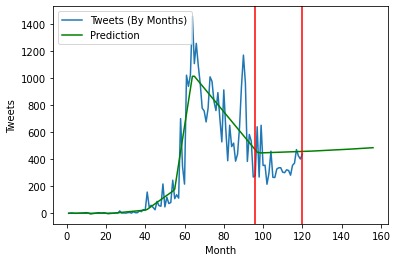

In [89]:
import matplotlib.pyplot as plt
predx=list(range(1,157))
predy=[]
for x_val in predx:predy.append(nn.predict([[x_val]]))
plt.plot(x,y,label='Tweets (By Months)')
plt.xlabel('Month')
plt.ylabel('Tweets')
plt.plot(predx,predy,color='green',label='Prediction')
plt.axvline(96,color='red')
plt.axvline(120,color='red')
plt.legend()
plt.show()

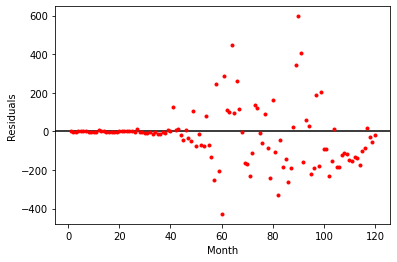

In [90]:
import matplotlib.pyplot as plt
x=list(range(1,121))
resy=[]
for i in range(len(y)):resy.append(y[i]-predy[i])
for x_val in predx:predy.append(nn.predict([[x_val]]))
plt.axhline(0,color='black')
plt.xlabel('Month')
plt.ylabel('Residuals')
plt.plot(x,resy,color='red',marker='.',linestyle='None')
plt.show()